<a href="https://colab.research.google.com/github/inhopp/ML_code/blob/main/opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 인프런에 있는 권철민님의 [딥러닝 컴퓨터 비전 완벽 가이드](https://www.inflearn.com/course/%EB%94%A5%EB%9F%AC%EB%8B%9D-%EC%BB%B4%ED%93%A8%ED%84%B0%EB%B9%84%EC%A0%84-%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C/dashboard) 강의 실습 자료입니다.

## OpenCV 이미지 처리 이해 및 타 패키지 비교

### Python Image Library (PIL)

- 이미지 처리만
- 느린 편

In [1]:
# 테스트 이미지 다운
!mkdir ./data
!wget -O /content/data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2022-02-15 11:45:01--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘/content/data/beatles01.jpg’

/content/data/beatl 100%[===================>] 374.14K  --.-KB/s    in 0.03s   

2022-02-15 11:45:01 (10.6 MB/s) - ‘/content/data/beatles01.jpg’ saved [383118/383118]



image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>


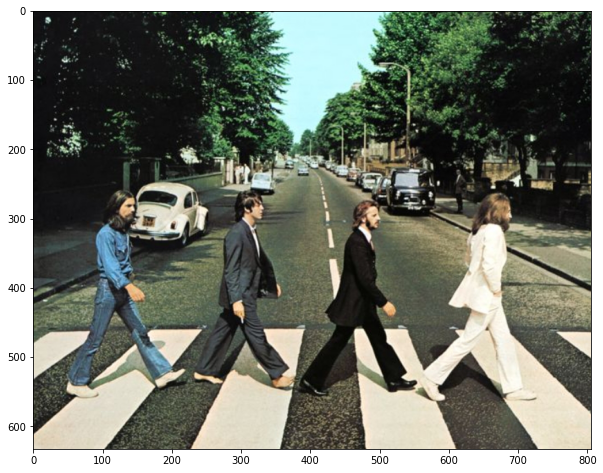

In [2]:
import matplotlib.pyplot as plt
import os
%matplotlib inline

from PIL import Image

# PIL은 open()으로 image file 읽어서 ImageFile 객체 생성
pil_image = Image.open('/content/data/beatles01.jpg')
print('image type:', type(pil_image))

plt.figure(figsize=(10, 10))
plt.imshow(pil_image)

### Scikit Image
- python 기반의 컴퓨터 비전 기능 제공
- Scipy 기반
- 원본 이미지를 RGB 형태의 넘파이 배열로 반환

sk_image type: <class 'numpy.ndarray'>  sk_image shape: (633, 806, 3)


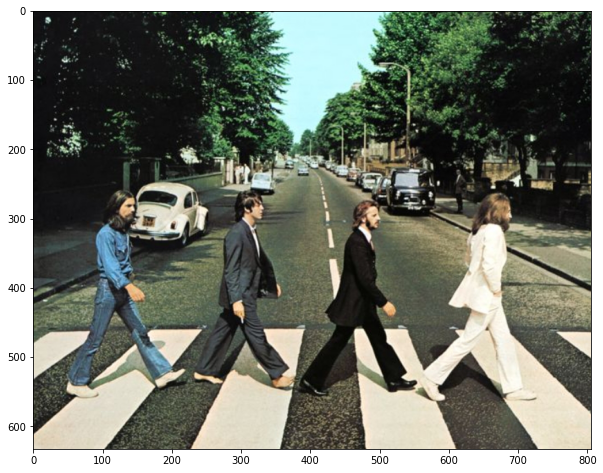

In [3]:
from skimage import io

#skimage는 imread()로 이미지를 넘파이 배열로 반환
sk_image = io.imread('/content/data/beatles01.jpg')
print('sk_image type:', type(sk_image), ' sk_image shape:', sk_image.shape)

plt.figure(figsize=(10, 10))
plt.imshow(sk_image)

### OpenCV
- imread()를 이용하여 원본 RGB 이미지를 <u>BGR</u> 형태의 넘파이 배열로 반환
- OpenCV의 imwrite()를 이용한다면 BGR 형태의 이미지 배열을 파일에 기록할 때 다시 RGB형태로 변환하므로 사용자는 RGB->BGR->RGB 변환에 신경쓰지 않아도 됨. 
- 왜 이렇게 했는지는 잘 모른다고 함...

cv_image type: <class 'numpy.ndarray'>  cv_image shape: (633, 806, 3)


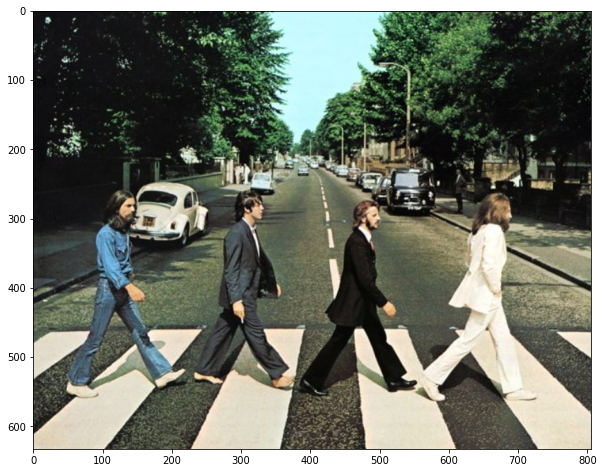

In [4]:
import cv2

cv2_image = cv2.imread('/content/data/beatles01.jpg')
cv2.imwrite('/content/data/beatles02_cv.jpg', cv2_image)
print('cv_image type:', type(cv2_image), ' cv_image shape:', cv2_image.shape)

plt.figure(figsize=(10, 10))
img = plt.imread('/content/data/beatles02_cv.jpg')
plt.imshow(img)

imread() 사용하지 않고 그대로 시각화 하면?

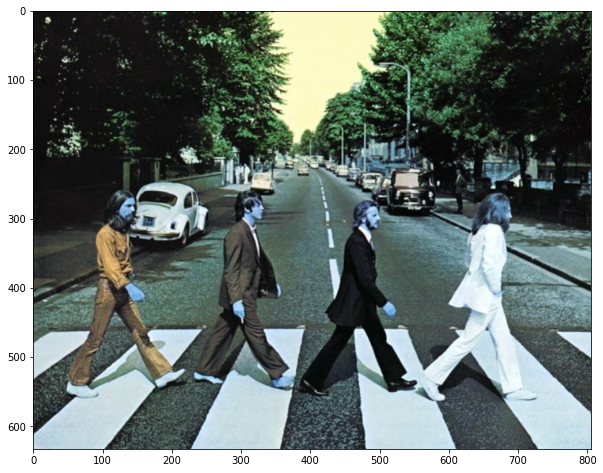

In [5]:
cv2_image = cv2.imread('/content/data/beatles01.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(cv2_image)
plt.show()

In [6]:
cv2_image = cv2.imread('/content/data/beatles01.jpg')
cv2_image[:, :, 0] # Blue channel

array([[ 19,  19,  20, ...,  47,  39,  64],
       [ 20,  20,  20, ...,  71,  40,  36],
       [ 20,  20,  20, ...,  82,  54,  40],
       ...,
       [198, 199, 201, ..., 190, 189, 188],
       [198, 198, 199, ..., 188, 188, 186],
       [199, 199, 198, ..., 186, 186, 186]], dtype=uint8)

In [7]:
cv2_image[:, :, 2] # Red channel

array([[ 18,  18,  18, ...,  47,  39,  64],
       [ 19,  19,  18, ...,  72,  41,  37],
       [ 18,  18,  18, ...,  84,  56,  41],
       ...,
       [225, 226, 228, ..., 231, 230, 229],
       [225, 225, 226, ..., 229, 229, 227],
       [225, 225, 224, ..., 227, 227, 227]], dtype=uint8)

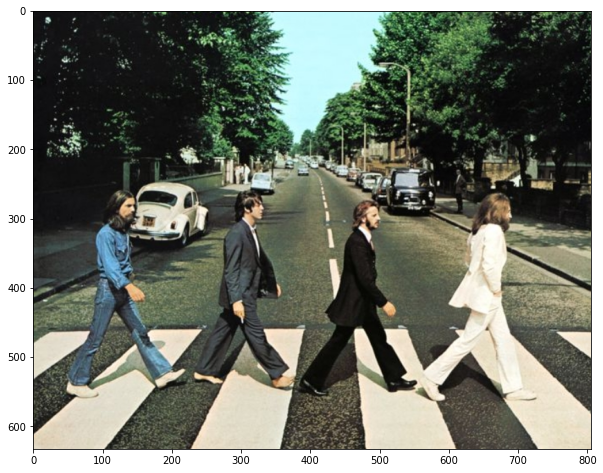

In [8]:
# 이런 식으로 많이 씀
draw_image = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(draw_image)
plt.show()

## OpenCV 영상처리

- OpenCV는 간편하게 비디오 영상처리를 할 수 있는 API 제공
- VideoCapture 객체는 Video Streaming을 Frame 별로 Capture하여 처리할 수 있는 기능 제공
- VideoWriter 객체는 VideoCapture로 읽어들인 Frame을 동영상으로 Write하는 기능 제공

In [9]:
# 테스트 비디오 다운
!mkdir ./data
!wget -O /content/data/Night_Day_Chase.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true

mkdir: cannot create directory ‘./data’: File exists
--2022-02-15 12:13:17--  https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4 [following]
--2022-02-15 12:13:17--  https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4 [following]
--2022-02-15 12:13:17--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubuse

In [10]:
import cv2

video_input_path = '/content/data/Night_Day_Chase.mp4'
video_output_path = '/content/data/Night_Day_Chase_out.mp4'
# linux에서 video output 확장자 avi로 설정해야 한다고 함

cap = cv2.VideoCapture(video_input_path)
codec = cv2.VideoWriter_fourcc(*'XVID')
# 특정 포맷으로 encoding  가능

vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
vid_fps = cap.get(cv2.CAP_PROP_FPS) # Frame Per Second

vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size)

frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("총 Frame 개수:", frame_cnt, "FPS:", round(vid_fps), 'Frame 크기:', vid_size)

총 Frame 개수: 1383 FPS: 28 Frame 크기: (1216, 516)


In [ ]:
import time

green_color=(0, 255, 0)
red_color=(0, 0, 255)
start = time.time()
index = 0

while True:
  hasFrame, img_frame = cap.read()
  if not hasFrame:
    print('더 이상 처리할 frame이 없습니다.')
    break
  index += 1
  print('frame:', index, '처리완료')

  cv2.rectangle(img_frame, (300, 100, 800, 400), color=green_color, thickness=2) ## 테스트를 위해 하드코딩(실제로는 ground truth box)
  caption = "frame:{}".format(index)
  cv2.putText(img_frame, caption, (300, 95), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 1) ## 테스트를 위해 하드코딩(실제로는 proposal)
  
  vid_writer.write(img_frame)

print('write 완료 시간:', round(time.time() - start, 4)) # 소수점 4칸까지
vid_writer.release()
cap.release()